<a href="https://colab.research.google.com/github/AlexMa123/BIU-Computational-Physics-2022/blob/main/Lecture2%20-%20fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fractal

## Review

### Why do we need fractals?
Euclidian geometry cannot describe complex structures in nature, since it deals only with simple shapes and forms such as straight lines, triangles, circles and so on. However, nature doesn't have such simple structures. 

|![example of fractals](https://www.researchgate.net/publication/340926663/figure/fig1/AS:941847388110856@1601565324876/Examples-of-fractal-a-Examples-of-mathematical-fractals-Bovill-1996-b-Examples-of.png)|
|:-:|
|*Fig1.1: a) Examples of mathematical (deterministic) fractals: Koch curve, Sierpinski triangle, dragon curve; b) Fractal in nature*|

### What is a fractal ?
A fractal is an object or quantity that displays `self-similarity`, in a somewhat technical sense, on all scales. The object needs not to exhibit exactly the same structure at all scales, but `the same "type" of structures must appear on all scales`. A plot of the quantity on a log-log graph versus scale then yields a straight line, whose slope is said to be the fractal dimension. The prototypical example for a fractal is the length of a coastline measured with rulers of different lengths.

### Self-similarity and scale invariance

The most important property of fractals is their [self-similarity](https://en.wikipedia.org/wiki/Self-similarity). Self-similarity means the object looks "roughly" the same on any scale. Note the main difference between regular Euclidean space and fractal geometry: whereas regular space is symmetric under translation, in fractals this symmetry is violated. Instead, fractals possess a new symmetry, called scale invarience.

|![Self-similarity](https://i.imgur.com/YHRsUQC.gif)|
|:--:| 
|*Fig 1.3.1 Self-similarity in the Mandelbrot set shown by zooming in on the Feigenbaum point*|

|![scale-invariance](https://upload.wikimedia.org/wikipedia/commons/2/2a/Wiener_process_animated.gif)|
|:--:|
|*Fig 1.3.2 The Wiener process (a stochastic process) is scale-invariant.*|


### Types of Fractals
* Determinisitic
     - also: "ideal fractals"
     - every small part of the picture when magnified properly looks as the whole picture.
     - Examples: Koch curve, dragon fractal, Sierpinski gasket, Mandelbrot set ...
* random
     - Examples: infinite cluster generated by percolation near the critical threshold, scale-free network, Brownian motion (or Wiener process)

### Generate Koch curve by python

> numba is a package used to translate Python functions to optimized machine code at runtime.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import plotly.express as px

In [84]:
from numba import njit, prange

def mysum(n=10000):
    result = 0
    for i in range(n):
        result = result + i
    return result

@njit
def mysum_njit(n=10000):
    result = 0
    for i in range(n):
        result = result + i
    return result

mysum_njit()

49995000

In [85]:
%timeit mysum()

617 µs ± 37.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [87]:
%timeit mysum_njit()

212 ns ± 10.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


![koch curve](https://www.researchgate.net/profile/Marcelo-Ribeiro-37/publication/26365833/figure/fig5/AS:310046622797835@1450932283682/Construction-of-the-von-Koch-curve-F-At-each-stage-the-middle-third-of-each-interval.png)

In [95]:
@njit
def add_trangle(x1, y1, x2, y2):
    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) / 3 # length for each small elements
    angle = np.arctan2(y2 - y1, x2 - x1) # angle of the original line
    x_new = np.zeros(5)
    y_new = np.zeros(5)
    x_new[0], x_new[4] = x1, x2
    y_new[0], y_new[4] = y1, y2
    
    x_new[1] = (x2 - x1) / 3 + x1
    y_new[1] = (y2 - y1) / 3 + y1
    
    x_new[2] = x_new[1] + np.cos(angle + np.pi / 3) * length
    y_new[2] = y_new[1] + np.sin(angle + np.pi / 3) * length
    
    x_new[3] = x2 - (x2 - x1) / 3
    y_new[3] = y2 - (y2 - y1) / 3
    
    return x_new, y_new

@njit
def iterate_koch(x, y):
    """
    Input:
        x: array
        y: array
    Return:
        x_new: array
        y_new: array
    """
    x_new = np.zeros((x.size - 1) * 3 + x.size)
    y_new = np.zeros((y.size - 1) * 3 + y.size)
    for j in range(x.size - 1):
        # insert three points between every two points
        x_new[j * 4: j * 4 + 5], y_new[j * 4: j * 4 + 5] \
                = add_trangle(x[j], y[j], x[j+1], y[j+1])
    return x_new, y_new

@njit
def koch_curve(n, x=np.array([0., 1.]), y=np.array([0., 0.])):
    for i in range(n):
        x, y = iterate_koch(x, y)

    return x, y

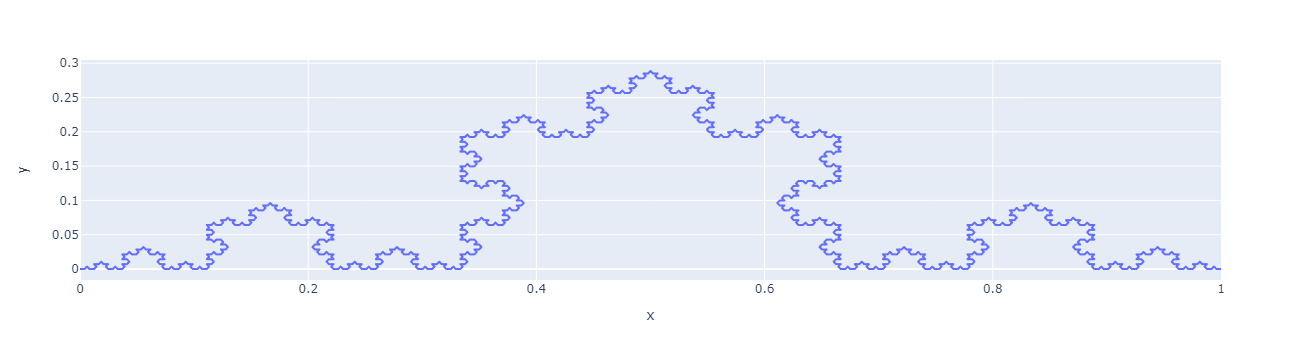

In [103]:
kochcurve = koch_curve(5)
px.line(x=kochcurve[0], y=kochcurve[1])

In [102]:
koch_curve(2)[1].size

17

(0.0, 1.0, -0.01, 0.3)

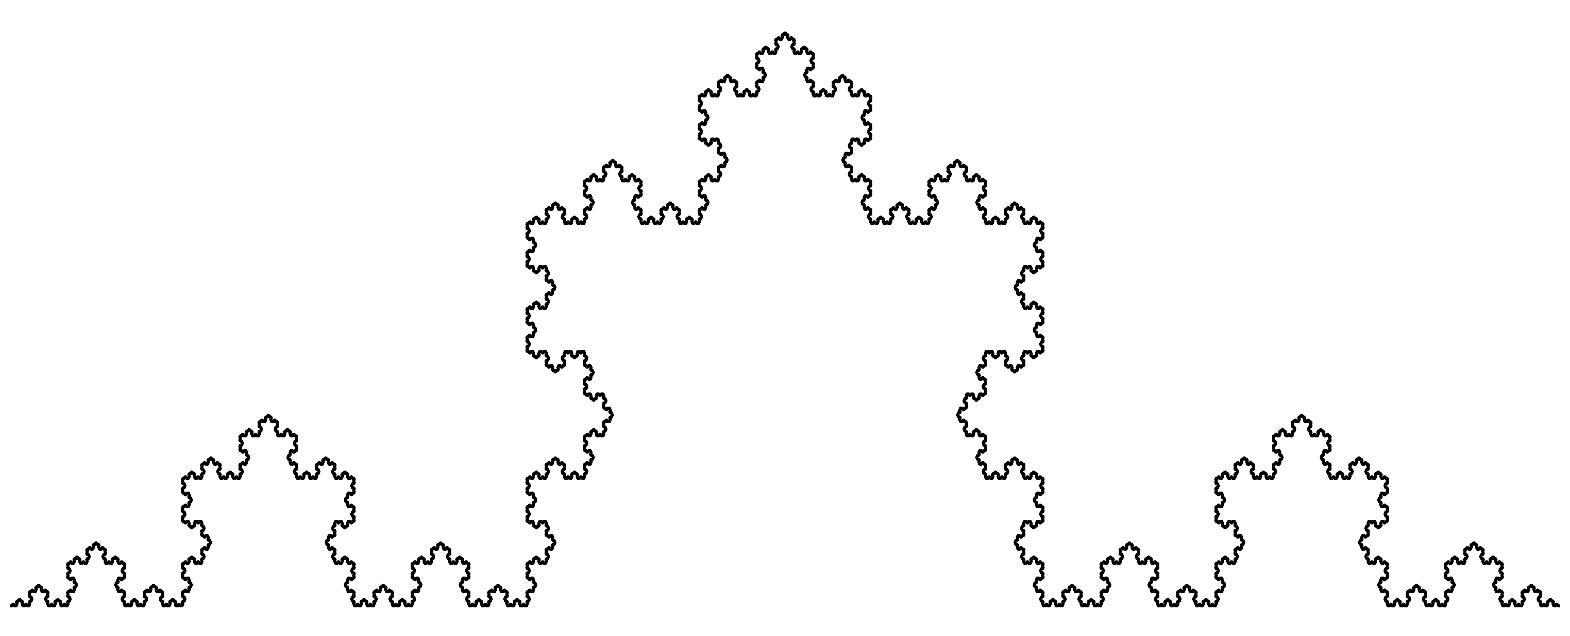

In [4]:
plt.figure(figsize=(20, 8))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.01, 0.3)
plt.axis('off')

### Entropy and Fractional Dimension
It seems reasonable to describe the chaotic and unpredictable nature of
a dynamical system with probabilistic concepts. It turns out that this is indeed very
fruitful, allowing one to quantify the complexity of the dynamics. Therefore, in this
section we study dynamical systems through the lens of information theory. After
introducing the concepts of information and entropy, we look into ways with which
to probabilistically describe a deterministic dynamical system. Then, we expand
on practically using these concepts to define dimensionality of chaotic sets

#### Why do we measure the fractional dimension ?
1. Fractional dimension is a measure of "fine structure"
2. The fractional dimension approximates the effective degrees of freedom of the system
3. it retains its value if we do a linear transform on the system

#### Generalized Entropy

The Shannon entropy can be extended to the so-called `generalized` or `Renyi` entropy
$$H_q(\varepsilon) = \frac{1}{1-q} \log \left( \sum_m P_m^q \right)$$

When q=1, the function will reduces to $- \sum_m P_m \log P_m$ （L′Hospital′s rule）

In [5]:
def renyi_entropy(p, q):
    p = p[p != 0]
    if q == 1:
        return - np.sum(np.log(p) * p)
    else:
        return 1 / (1 - q) * np.log(np.sum(p ** q))

#### Amplitude Binning
Before calculating the the entropy, first we need to have a histogram. If our system can be represented by a set $X=(x_1, ..., x_N)$ which could,
for example, be obtained from a trajectory of a dynamical system sampled at times $(t_1, ..., t_N)$. The simplest way to obtain probabilities $P_m$ for X is to partition the D-dimensional space into boxes of edge length $\varepsilon$ and then for each box m, we count how many elements of X are inside this box, $M_m$
$$P_m(\varepsilon) \approx \frac{M_m(\varepsilon)}{N}$$

In [6]:
# (N, D)
def count_hist(trace, epsilon=1):
    bins = []
    for i in range(trace.shape[1]):
        min_value, max_value = trace[:, i].min(), trace[:, i].max()
        binning = np.arange(min_value - epsilon, max_value + epsilon * 1.1, epsilon) 
        # NOTE: The arange function won't include the last poionts
        bins.append(binning)
    
    # histogramdd is a function to compute the multidimensional histogram of some data.
    hist, binedges = np.histogramdd(trace, bins=bins)
    hist = hist / trace.shape[0]

    return hist

Amplitude of Koch curve

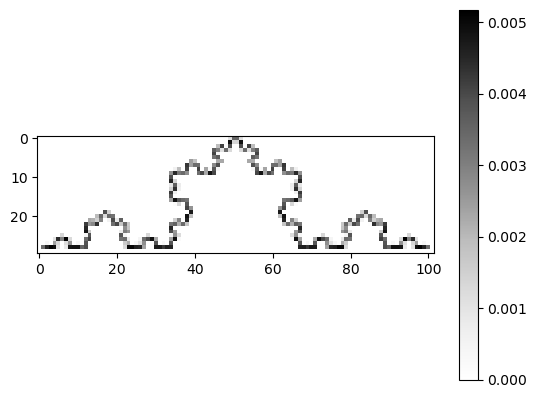

In [108]:
kochcurve = np.array(koch_curve(8)).T
hist = count_hist(kochcurve, 0.01)
plt.imshow(hist[:, ::-1].T, cmap='Greys')
plt.colorbar()

#### Estimate fractional dimension
For a smaller $\varepsilon$, which means we focus more on the fine struction, the Entropy will become larger, the `generalized dimension` $\Delta^{(H)}_q$ is defined as:
$$\Delta^{(H)}_q = - \lim_{\varepsilon \rightarrow 0} \frac{H_q(\varepsilon)}{\log \varepsilon}$$

For the special case $q = 0$, the entropy become `Hartley entropy`
$$H_0(\varepsilon) = \log \sum_m P_m^0 = \log N$$
where N is the number of bins that has been visited

So $\Delta_0^{(H)}$ is the box-counting dimension we talked during the course

In [109]:
kochcurve = np.array(koch_curve(8)).T
epsilons = np.logspace(-3.5, -1.5, 20)
entropies = np.zeros_like(epsilons)
for i, e in enumerate(epsilons):
    hist = count_hist(kochcurve, e)
    entropies[i] = renyi_entropy(hist, q=0)

In [82]:
pars = np.polyfit(np.log(epsilons), - entropies, deg=1)
print("The estimated box-counting dimension is ", pars[0])
print("The real dimension is: ", np.log(4) / np.log(3))

The estimated box-counting dimension is  1.2668266697191293
The real dimension is:  1.2618595071429148


Text(0, 0.5, '- entropy')

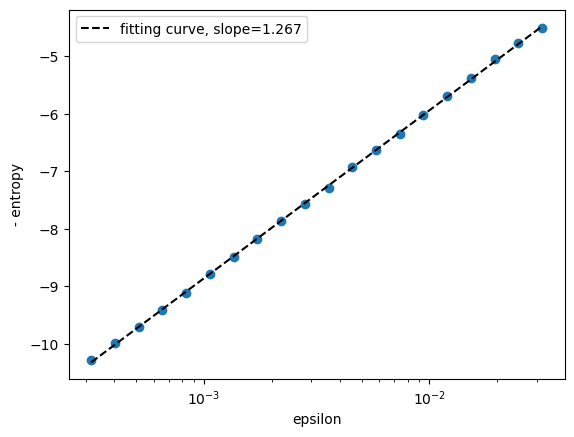

In [83]:
plt.plot(epsilons, - entropies, 'o')
plt.plot(epsilons, pars[0] * np.log(epsilons) + pars[1], 'k--', label=f'fitting curve, slope={pars[0]:.3f}')
plt.xscale('log')
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('- entropy')

#### Fractional dimension as the effective degrees of freedom of the system

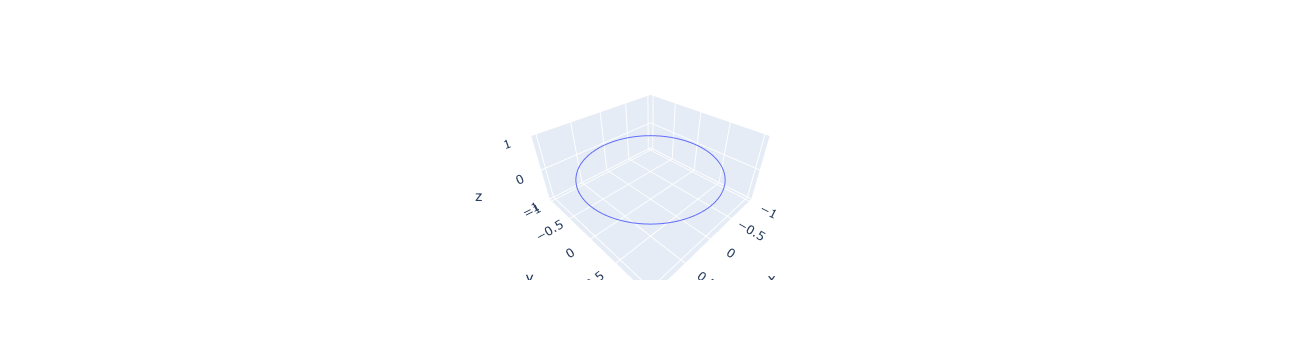

In [62]:
theta = np.arange(0, 2 * np.pi, 0.0001)
x = np.sin(theta)
y = np.cos(theta)
z = np.zeros_like(x)
result = np.array([x, y, z])

px.line_3d(x=result[0, :], 
           y=result[1, :], 
           z=result[2, :])

In [66]:
epsilons = np.logspace(-3, -0.5, 20)
entropies = np.zeros_like(epsilons)
for i, e in enumerate(epsilons):
    hist = count_hist(result.T, e)
    entropies[i] = renyi_entropy(hist, q=0)

In [67]:
pars = np.polyfit(np.log(epsilons), - entropies, deg=1)
print("The estimated box-counting dimension is ", pars[0])

The estimated box-counting dimension is  1.0021665153272445


Text(0, 0.5, '- entropy')

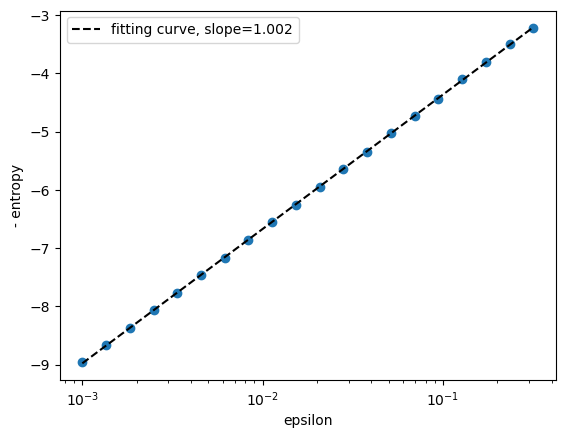

In [68]:
plt.plot(epsilons, - entropies, 'o')
plt.plot(epsilons, pars[0] * np.log(epsilons) + pars[1], 'k--', label=f'fitting curve, slope={pars[0]:.3f}')
plt.xscale('log')
plt.legend()
plt.xlabel('epsilon')
plt.ylabel('- entropy')

#### Fractional dimension for a Lorentz attractor

In [46]:
from scipy.integrate import solve_ivp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [1.0, 1.0, 1.0]  # Initial state of the system

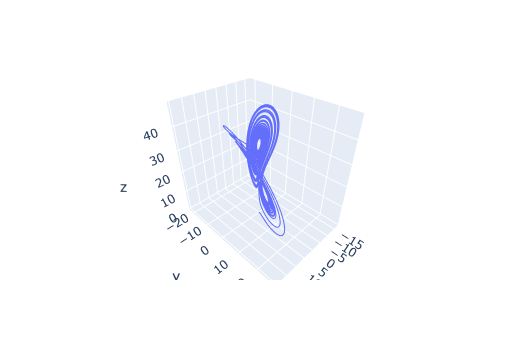

In [47]:
t_span = (0.0, 40.0)
t_steps = np.arange(0, 40, 0.01)
result_lorentz = solve_ivp(lorenz, t_span, y0, t_eval=t_steps, args=p)

px.line_3d(x=result_lorentz.y[0, :], 
           y=result_lorentz.y[1, :], 
           z=result_lorentz.y[2, :])

In [69]:
t_span = (0.0, 10000.0)
result_lorentz = solve_ivp(lorenz, t_span, y0, method='LSODA', args=p)

In [74]:
epsilons = np.logspace(-0.5, 1, 15)
entropies = np.zeros_like(epsilons)
for i, e in enumerate(epsilons):
    hist = count_hist(result_lorentz.y.T, e)
    entropies[i] = renyi_entropy(hist, q=0)

In [75]:
pars = np.polyfit(np.log(epsilons), -entropies, deg=1)

Text(0, 0.5, '-entropy')

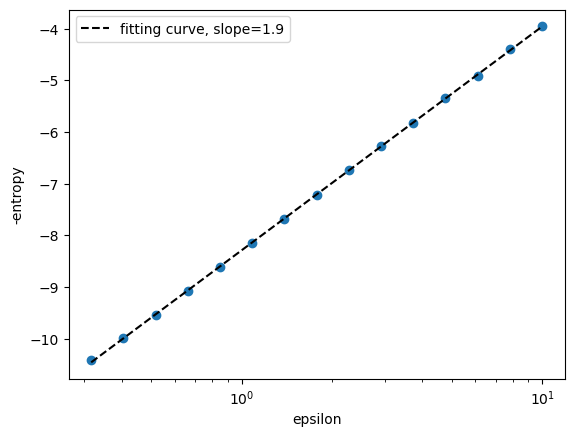

In [77]:
plt.figure()
plt.plot(epsilons, -entropies, 'o')
plt.plot(epsilons, np.log(epsilons) * pars[0] + pars[1], 'k--', label=f'fitting curve, slope={pars[0]:.1f}')
plt.legend()
plt.xscale('log')
plt.xlabel('epsilon')
plt.ylabel('-entropy')

The fractional dimension for a lorentz attractor is close to 2. This means that, while living in 3D space, the chaotic attractor is locally
very flat, like a plane.

### One example of fractals in Chaos - The Logistic Map

A very nice video https://www.youtube.com/watch?v=ovJcsL7vyrk

The logistic map is described by the equation:
   $$x_{n+1} = r x_n (1-x_n)$$
  
and $x_n$ is between zero and one, $r$ is the growth factor (growth rate)

In [52]:
from numba import njit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual

@njit
def logistic_map(r=3, x0=0.5, nstep=50):
    x = np.zeros(nstep)
    x[0] = x0
    for i in range(nstep-1):
        x[i + 1] = r * x[i] * (1 - x[i])
    return x

def plot_logistic(r, x0):
    plt.figure(figsize=(20, 5))
    plt.plot(logistic_map(r, x0, 100), 'o-')
    plt.ylim(0, 1)
    # plt.plot(logistic_map(r, x0 + 1e-4, 100), 'o-')

In [53]:
interactive(plot_logistic, r=widgets.FloatSlider(
    value=3.3, min=0.5, max=3.99, step=0.01
), x0=widgets.FloatSlider(
    value=0.501, min=0.01, max=1, step=0.01
))

interactive(children=(FloatSlider(value=3.3, description='r', max=3.99, min=0.5, step=0.01), FloatSlider(value…

#### visualize bifuecation

In [ ]:
def bifurcation(r_array, x0=0.5, nstart=10000, nmax=10256):
    """
    calculate stable values for different r
    Input:
        r_array: array, r values
        x0: float
        nstart: int, wait nstart steps before recording
        nmax: int, number of step to iterate.
    Return:
        List of array, length of the list will be the same with the length of r_array
    """
    b = []
    for r in r_array:
        x = logistic_map(r, x0, nmax)
        x = np.round(x[nstart:], 8) # round an array to the given number of decimals.
        b.append(np.unique(x)) # Returns the sorted unique elements of an array. 
    return b        

In [ ]:
r_array = np.arange(0.5, 3.99, 0.001)
b = bifurcation(r_array)

In [ ]:
points = []
for i, r in enumerate(r_array):
    for be in b[i]:
        points.append((r, be))
points = np.array(points)
points.shape

(101623, 2)

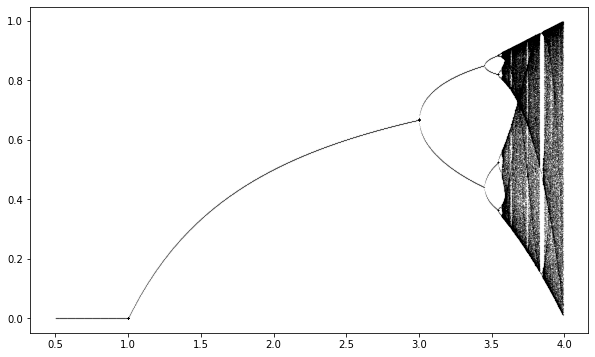

In [ ]:
fig1 = plt.figure(figsize=(10,  6))

plt.plot(points[:, 0], points[:, 1], 'k.', markersize=0.1)
# plt.xlim(3.8, 3.9)

From the bifurcation diagram,  we can find period-doubling bifurcation

![logistic map zoom in](https://juliadynamics.github.io/JuliaDynamics/videos/interact/interactive_chaos_logo.gif)


### Mandelbort set

If we let $z = r (\frac{1}{2} - x)$, $c = \frac{r}{2} (1 - \frac{r}{2})$, the logistic map will be transformed to:
$$z_{n+1} = z_n ^ 2 + c$$

Now let's consider z is a complex number. The Mandelbrot set is the set of complex numbers c for which $z_n$ doesn't diverge to infinity when $z_0 = 0$

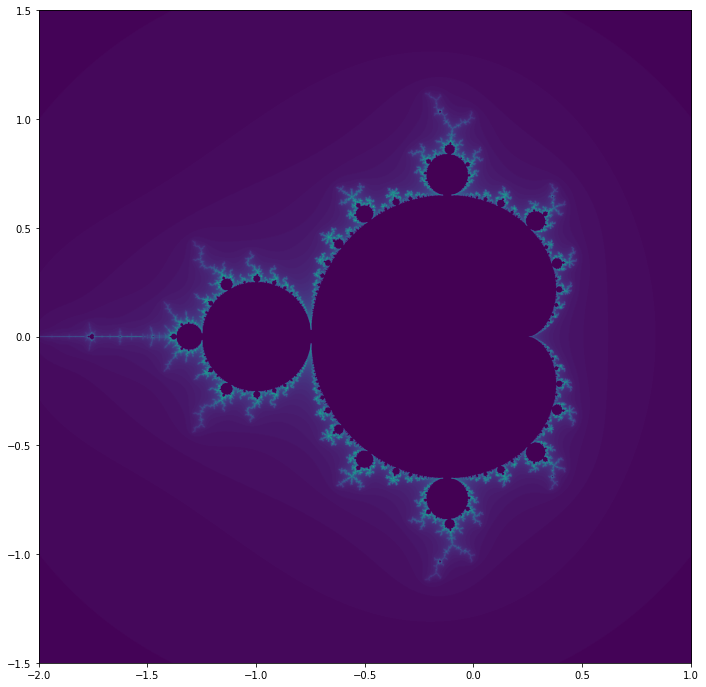

In [ ]:
@njit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    Input:
        x: float
        y: float
        max_iters: int
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 10:
            return i

    return 0

@njit
def create_fractal(x, y, iters):
    """
    Input:
        x: 2d array
        y: 2d array
        iters: int
    """
    color = np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            real = x[i, j]
            imag = y[i, j]
            color[i, j] = mandel(real, imag, iters)
           
    return color

x = np.arange(-2, 1, 0.001) ## real part
y = np.arange(-1.5, 1.5, 0.001) ## imag part
x, y = np.meshgrid(x, y)


image = create_fractal(x, y, 100)

plt.figure(figsize=(12, 12))
plt.imshow(image, extent=[-2, 1, -1.5, 1.5])
plt.show()

Figure from wikipedia, logistic map with mandelbort set

![Mandelbort set with logistic](https://www.researchgate.net/profile/Tssachin-Venkatesh/publication/343986739/figure/fig1/AS:930432354897922@1598843768697/The-real-line-on-the-mandelbrot-set-lines-up-with-the-bifurcations-in-the-logistic-map-1.jpg)
